In [1]:
# importing python libraries required for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msgno


/var/folders/dt/9p_fdpvn1lz7gcclv_4_v6780000gp/T/ipykernel_69731/1804695535.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('./loan.csv')


<AxesSubplot: >

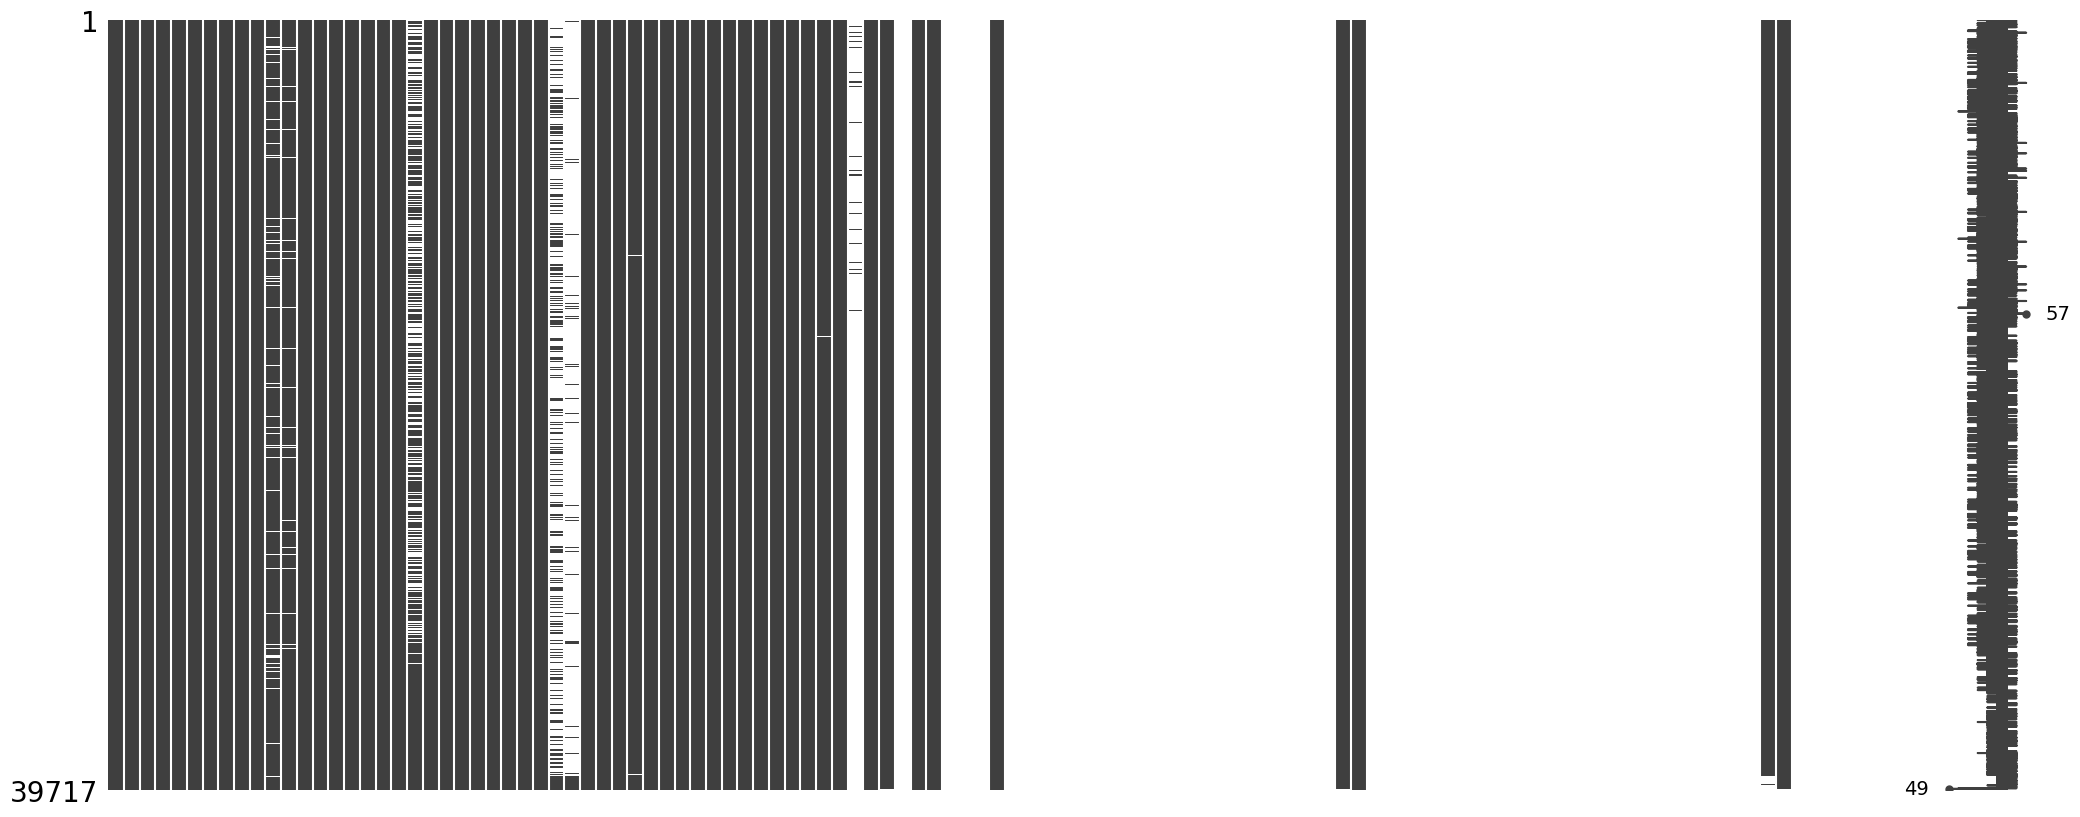

In [2]:
#FILE READ

#read the loan file using pandas library
loan = pd.read_csv('./loan.csv')
#Quick look at the header
loan.head()
#columns with missing values
loan.isnull().sum()
#visualize the missing values in columns
msgno.matrix(loan) 
#from the visualization below, its clear that, there are a lot of empty columns and there are missing values in many columns


In [3]:

#FILTERING DATA

#get the name of columns with ALL NULL/NA values
emptyCols = loan.columns[loan.isna().all(axis=0)].tolist()
#This will list following columns
#['mths_since_last_major_derog','annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
# 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
# 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
# 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
#remove empty columns since it will not contribute to the data analysis
loan.drop(emptyCols, inplace = True, axis = 1)

#remove columns related to customer behaviour variables since new customers may not have these values at the time of loan application and hence cannot be used for taking decision of loan disbursement
custBehav ={'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'}
loan.drop(custBehav, inplace = True, axis = 1)

#check other columns to check its content and uniqueness of values
loan.next_pymnt_d.value_counts()
loan.chargeoff_within_12_mths.value_counts()
loan.delinq_amnt.value_counts()
loan.tax_liens.value_counts()
loan.describe()
#remove columns which are mostly info fields related to loan and has not much relevance for the prediction. Also remove columns with mostly null/same 0 values
otherCols ={'url','desc','emp_title', 'next_pymnt_d', 'chargeoff_within_12_mths','delinq_amnt', 'tax_liens' } 
loan.drop(otherCols, inplace = True, axis = 1)

#cheque for duplicate records based on the 'id' column. As per the dictionary, ID is a unique LC assigned ID.
loan.drop_duplicates(subset=['id'])

#filter records with 'current' as loan status. These records can be omitted since the idea is to predict "Fully Paid" & "Charged Off" cases. Curret once are yet to get any of these statuses
loan.loan_status.value_counts() #shows that Current = 1140 records
loan.drop(loan[loan.loan_status == 'Current'].index, inplace=True)

#have a high level look at the new data set
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,acc_now_delinq,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38521.0,38577.0,38577.0,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,69.260949,0.0,1.0,0.0,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,43.987761,0.0,0.0,0.0,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,19.750000,0.0,1.0,0.0,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,90.000000,0.0,1.0,0.0,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.0,1.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,2.000000


In [4]:
#PREP DATA for analysis

#int_rate column has % attached. remove %. Change the datatype to numeric after that
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].apply(pd.to_numeric)

#emp_length has special characters like <, >,  +, years etc. use regex (\d+) to extract numbers
loan['emp_length']=loan.emp_length.str.extract('(\d+)') 
loan.emp_length.fillna('0',inplace=True) #there are n/a values in data. get it replaced with 0
loan['emp_length'] = loan['emp_length'].apply(pd.to_numeric) #convert to numeric

#term column has 'months' suffixed to values. remove months. Change the datatype to numeric after that
loan['term'] = loan['term'].str.rstrip('months')
loan['term'] = loan['term'].apply(pd.to_numeric)


<AxesSubplot: >

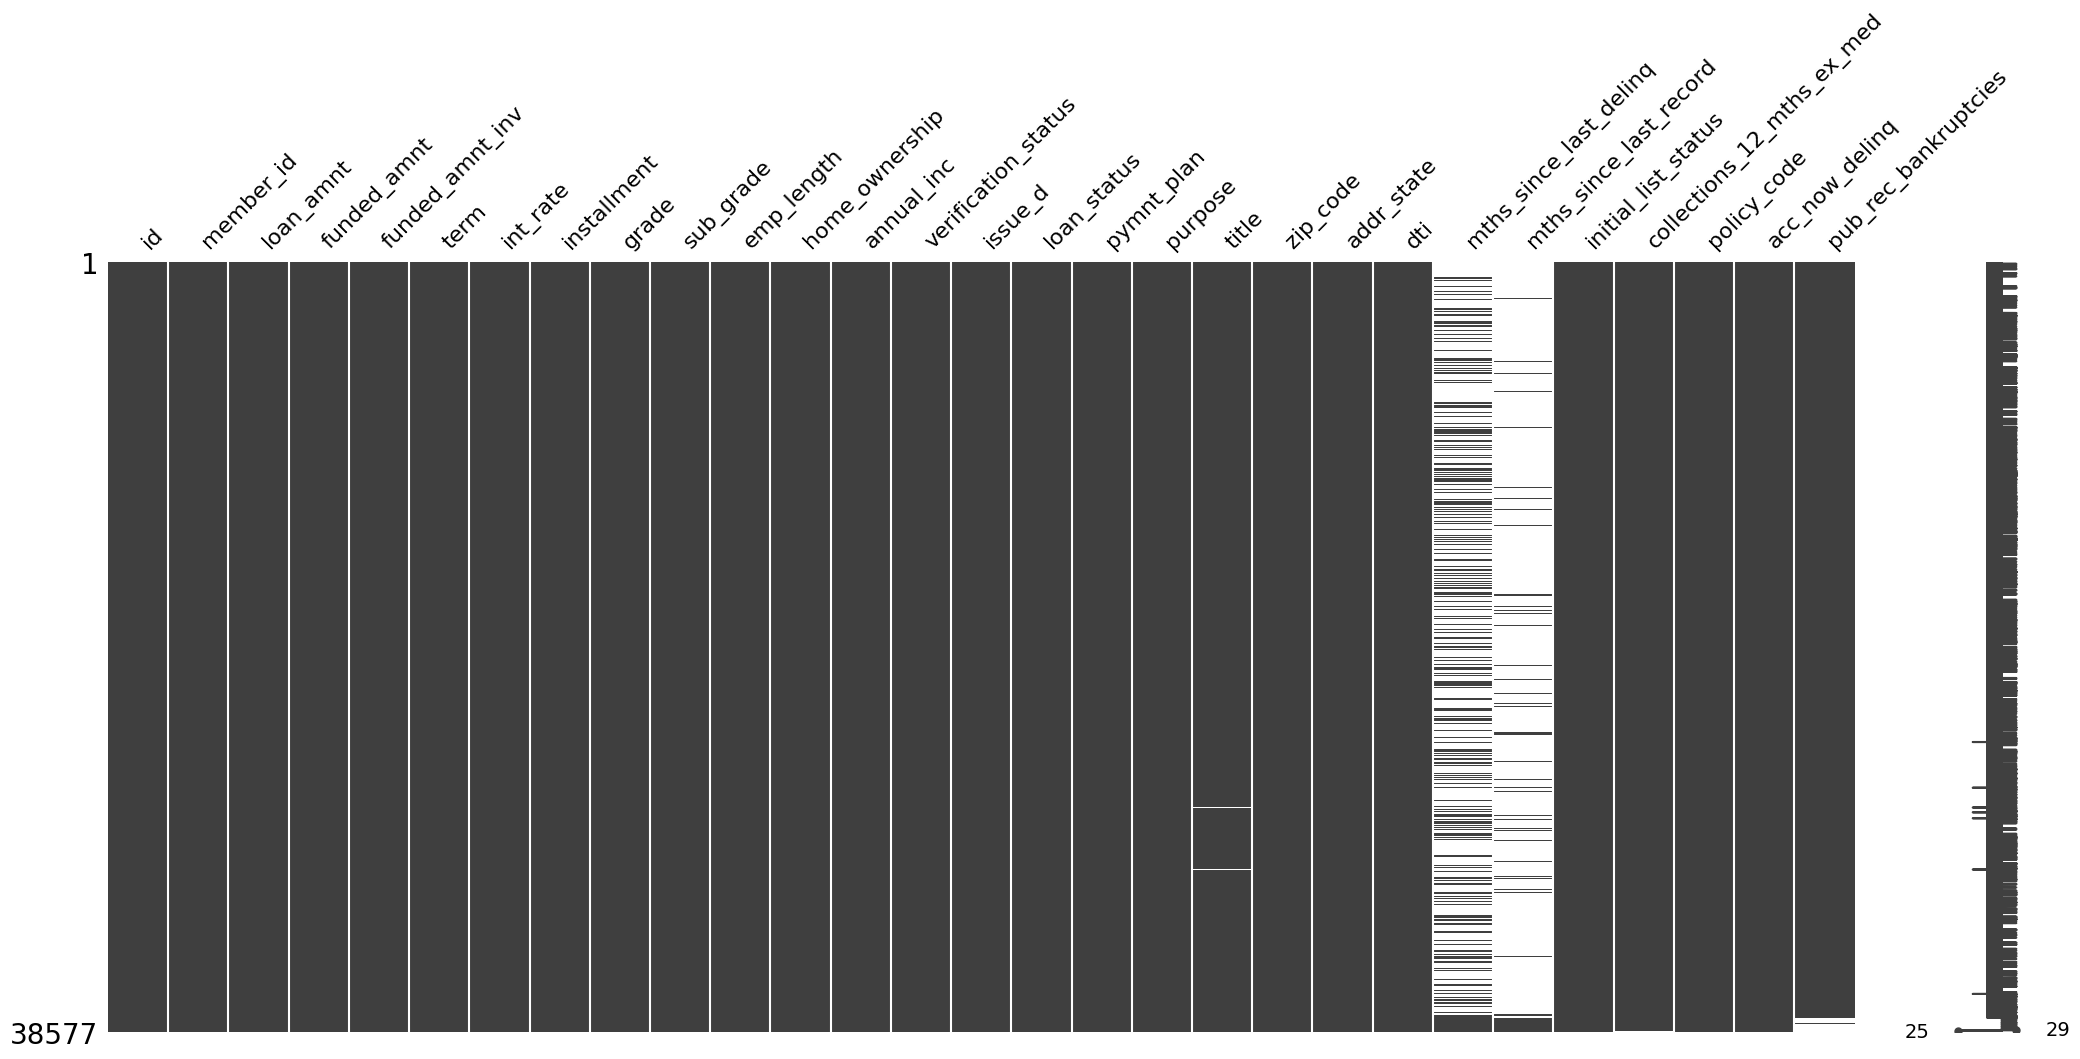

In [5]:
#inspect all the column data types and make sure its all of required types
loan.dtypes 
loan.describe()
#visualize the missing values in columns
msgno.matrix(loan) #from the graph below, data looks good and ready for further analysis


/var/folders/dt/9p_fdpvn1lz7gcclv_4_v6780000gp/T/ipykernel_64135/3525877604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(loan.corr())


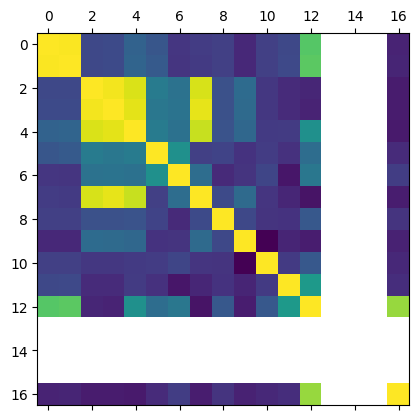

In [283]:
#understand the corelation
plt.matshow(loan.corr())
plt.show()

In [7]:
#QA BLOCK
#Before moving to analysing the data, do the basic sanity of data
#test and make sure only the unwanted columns & rows are removed
len(emptyCols) #this should return 54
len(custBehav) #this should return 21, hardcoded values based on manual analysis & knowledge of data
len(otherCols) #this should return 7, hardcoded values based on manual analysis & knowledge of data
#check the latest loan dataframe for columns(initial shape was (39717, 111))
loan.shape # this should return 38577, 29  (38577-1140 = 38577, 111-54-21-7 = 29)



(38577, 29)

In [ ]:
#UNIVARIATE ANALYSIS

In [ ]:
#BIVARIATE ANALYSIS